In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Ablation study of point cloud size

In [3]:
x = np.load("test_results/num_points1.npy")
y = np.vstack([np.array(row) for row in x[9:17]])
size = x[0:8]

In [4]:
extra = np.load("test_results/num_points2.npy")
y = np.vstack((y, extra))
size = np.append(size, 5120)

In [5]:
y_flat = np.ndarray.flatten(y)

In [6]:
size_flat = np.repeat(size,50)

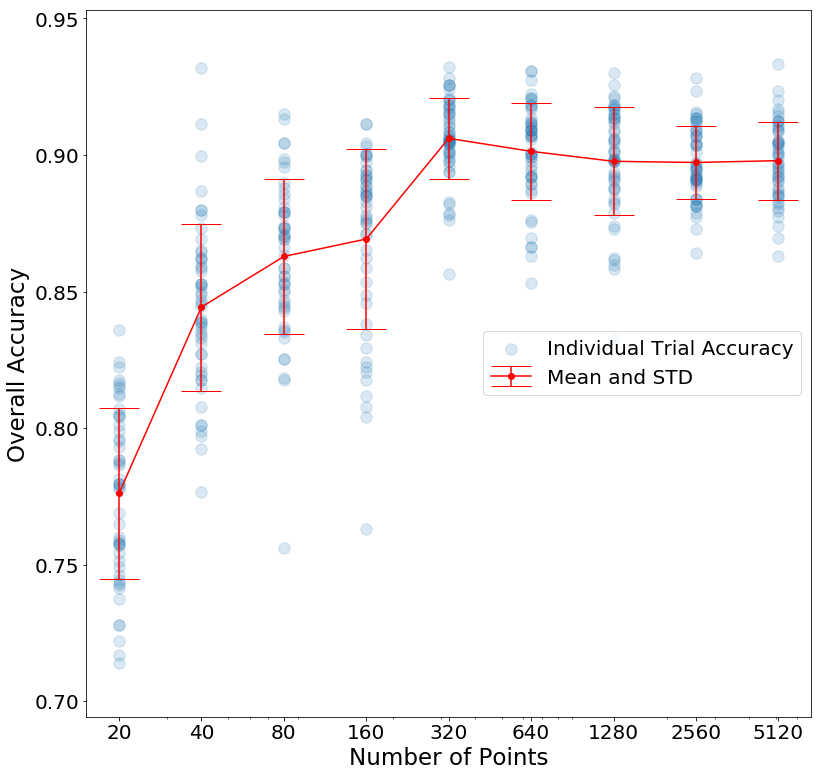

In [7]:
import matplotlib
from matplotlib import pyplot as plt
fig1, ax1 = plt.subplots()
fig1.set_figheight(13)
fig1.set_figwidth(13)
ax1.scatter(size_flat, y_flat, s=130, alpha=0.17)

ax1.errorbar(size, np.mean(y, axis=1), np.std(y, axis=1), marker='o', c=(1,0,0), capsize=20)
ax1.legend(["Individual Trial Accuracy", "Mean and STD"],loc=7, prop={'size': 20})
# ax1.plot(size, np.median(y, axis=1), 'r')
# ax1.plot(size, np.mean(y, axis=1), 'g')
ax1.set_xlabel("Number of Points",  fontsize=23)
ax1.set_ylabel("Overall Accuracy", fontsize=23)
ax1.tick_params(labelsize=20)

ax1.set_xscale('log')
ax1.set_xticks([20, 40, 80,160,320,640,1280,2560,5120])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

In [31]:
np.mean(x,axis=1)

array([0.75942308, 0.79429487, 0.8325641 , 0.85782051, 0.84762821,
       0.81371795, 0.83621795, 0.81397436, 0.79826923, 0.82532051])

In [98]:
import open3d as od
import numpy as np

# Downsampling/fusng visualization

In [99]:
num = 110

In [113]:
x = np.load("train/bird/bird2/npys/" + str(num) + "leftreduced.npy")
pcd = od.PointCloud()
pcd.points = od.Vector3dVector(x.T)
od.draw_geometries([pcd])

In [65]:
x = np.load("train/twofinger/twofinger4/npys/" + str(num) + "rightreduced.npy")
pcd = od.PointCloud()
pcd.points = od.Vector3dVector(x.T)
od.draw_geometries([pcd])

In [132]:
x = np.load("train/twofinger/twofinger4/npys/" + str(num) + "fused.npy")
pcd = od.PointCloud()
pcd.points = od.Vector3dVector(x.T)
pcd = od.voxel_down_sample(pcd, voxel_size = 0.0160)
print(len(pcd.points))
od.draw_geometries([pcd])

316


# Network Ablation

In [6]:
ab = np.load("test_results/ablation.npy")

In [7]:
print("Max Achieved in 300 iterations:")
print("Original Network: " + str(np.max(ab[0])))
print("Reduced Calorie Network: " + str(np.max(ab[1])))
print("Dropout Network: " + str(np.max(ab[2])))
print("Selu Network: " + str(np.max(ab[3])))
print("Reduced Network + Dropout: " + str(np.max(ab[4])))


Max Achieved in 300 iterations:
Original Network: 0.9742951907131011
Reduced Calorie Network: 0.9767827529021559
Dropout Network: 0.972636815920398
Selu Network: 0.972636815920398
Reduced Network + Dropout: 0.9684908789386402


In [8]:
print("Mean Achieved in 300 iterations:")
print("Original Network: " + str(np.mean(ab[0])))
print("Reduced Calorie Network: " + str(np.mean(ab[1])))
print("Dropout Network: " + str(np.mean(ab[2])))
print("Selu Network: " + str(np.mean(ab[3])))
print("Reduced Network + Dropout: " + str(np.mean(ab[4])))


Mean Achieved in 300 iterations:
Original Network: 0.9573797678275291
Reduced Calorie Network: 0.9554560530679934
Dropout Network: 0.9558181315644002
Selu Network: 0.9510060807075733
Reduced Network + Dropout: 0.9479270315091212


In [10]:
print("STD Achieved in 300 iterations:")
print("Original Network: " + str(np.std(ab[0])))
print("Reduced Calorie Network: " + str(np.std(ab[1])))
print("Dropout Network: " + str(np.std(ab[2])))
print("Selu Network: " + str(np.std(ab[3])))
print("Reduced Network + Dropout: " + str(np.std(ab[4])))


STD Achieved in 300 iterations:
Original Network: 0.01005746547267417
Reduced Calorie Network: 0.012484203142909864
Dropout Network: 0.01001280738097776
Selu Network: 0.013330567942648974
Reduced Network + Dropout: 0.013760014450730995


In [27]:
x = np.repeat([0,1,2,3,4],300)

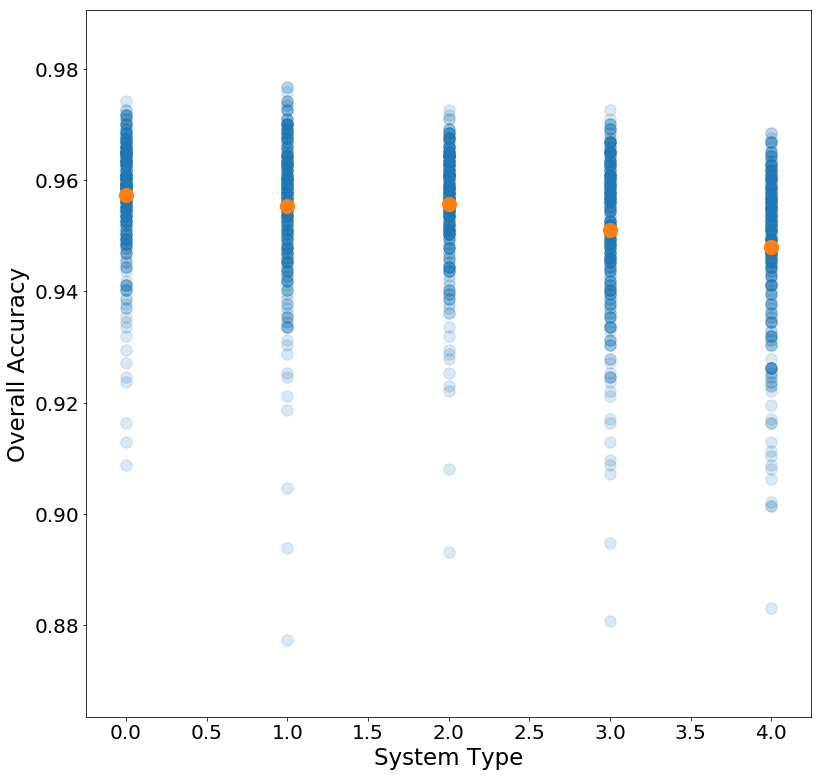

In [28]:
fig1, ax1 = plt.subplots()
fig1.set_figheight(13)
fig1.set_figwidth(13)
ax1.scatter(x, ab.flatten(), s=130, alpha=0.17)
ax1.scatter([0,1,2,3,4], np.mean(ab, axis=1),s=200)
# ax1.legend(["Individual Trial Accuracy", "Mean and STD"],loc=7, prop={'size': 20})
# ax1.plot(size, np.median(y, axis=1), 'r')
# ax1.plot(size, np.mean(y, axis=1), 'g')
ax1.set_xlabel("System Type",  fontsize=23)
ax1.set_ylabel("Overall Accuracy", fontsize=23)
ax1.tick_params(labelsize=20)


# Augmentation

In [15]:
ab = np.load("test_results/augmentation.npy")
x = np.repeat([0,0.01,0.05,0.1,0.25],100)￼

ab_fine = np.load("test_results/augmentation_fine.npy")
x_fine = np.repeat([0,0.01,0.02,0.03,0.04,0.05],25)

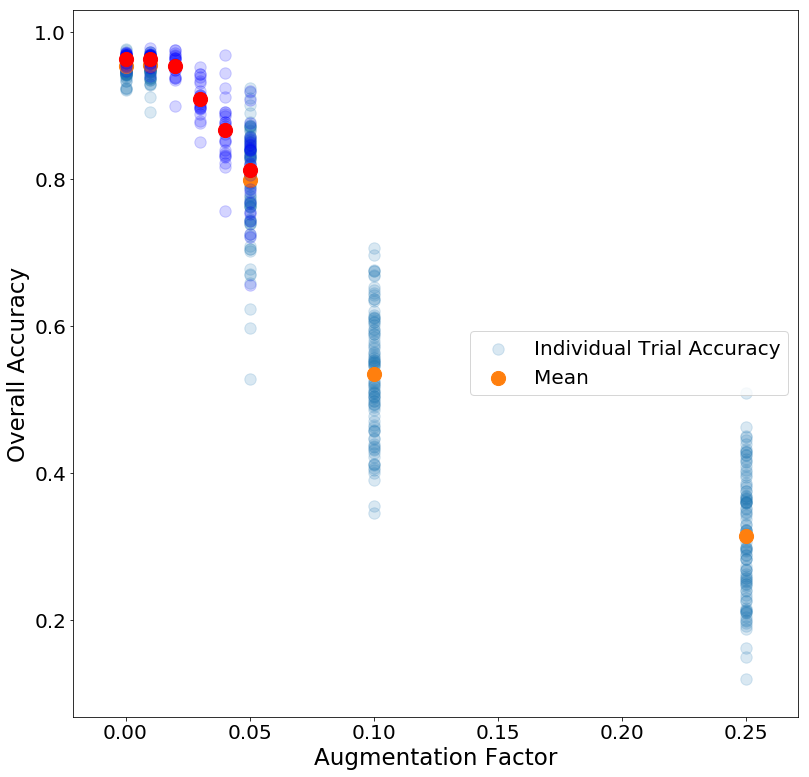

In [28]:
fig1, ax1 = plt.subplots()
fig1.set_figheight(13)
fig1.set_figwidth(13)
ax1.scatter(x, ab.flatten(), s=130, alpha=0.17)
ax1.scatter([0,0.01,0.05,0.1,0.25], np.mean(ab, axis=1),s=200)

ax1.scatter(x_fine, ab_fine.flatten(), s=130, alpha=0.17, c='b')
ax1.scatter([0,0.01,0.02,0.03,0.04,0.05], np.mean(ab_fine, axis=1),s=200,c='r')
ax1.legend(["Individual Trial Accuracy", "Mean"],loc=7, prop={'size': 20})
# ax1.plot(size, np.median(y, axis=1), 'r')
# ax1.plot(size, np.mean(y, axis=1), 'g')
ax1.set_xlabel("Augmentation Factor",  fontsize=23)
ax1.set_ylabel("Overall Accuracy", fontsize=23)
ax1.tick_params(labelsize=20)


# Results

In [29]:
acc = np.load("test_results/acc.npy")
mat = np.load("test_results/mat.npy")

In [129]:
import numpy
numpy.set_printoptions(threshold=numpy.nan)
# Class Accuracies
print("Class ACC")
print(np.round(np.mean(mat/100, axis=2),4))
# Class STD
print("Class STD")
print(np.round(np.std(mat/100, axis=2),4))
# Overall Accuracies
print("Overall ACC")
print(np.round(np.mean(acc,axis=1),4))
# Overall STD
print("Overall STD")
print(np.round(np.std(acc,axis=1),4))

Class ACC
[[0.8277 0.9603 0.9894 0.9725 0.9634 0.9955]
 [0.9142 0.7807 0.9582 0.8442 0.9922 0.6565]
 [0.8474 0.8249 0.9724 0.9276 0.9956 0.83  ]
 [0.6207 0.9378 0.7441 0.8892 0.4536 0.2882]
 [0.8794 0.9657 0.9629 0.9448 0.9657 0.9891]
 [0.7825 0.9009 0.81   0.9588 0.9842 0.9813]
 [0.688  0.9863 0.9553 0.9028 0.5277 0.2222]
 [0.8583 0.9251 0.9829 0.9277 0.9602 0.9858]
 [0.8575 0.9646 0.9953 0.9732 0.9931 0.9929]]
Class STD
[[0.2841 0.1461 0.0862 0.1255 0.1375 0.0605]
 [0.1887 0.237  0.1326 0.2228 0.0244 0.2107]
 [0.2379 0.2145 0.1289 0.178  0.0323 0.1746]
 [0.3148 0.1021 0.3147 0.1078 0.3066 0.1787]
 [0.2334 0.1137 0.1512 0.1669 0.1449 0.0461]
 [0.2686 0.1495 0.2885 0.1182 0.0946 0.0828]
 [0.3578 0.0602 0.1656 0.1195 0.3266 0.1812]
 [0.2612 0.1479 0.0979 0.177  0.1444 0.0754]
 [0.2639 0.1206 0.0402 0.1219 0.0678 0.0723]]
Overall ACC
[0.9726 0.9444 0.961  0.7778 0.9693 0.961  0.8002 0.9693 0.9867]
Overall STD
[0.0109 0.0502 0.041  0.0554 0.0122 0.0301 0.0424 0.0152 0.0093]


In [64]:
amat = 100 - mat

In [127]:
a = np.array(np.round(np.mean(acc,axis=1),4),dtype=np.str)
slash = np.array([["/" for i in range(1)] for i in range(9)],dtype=np.str)
b = np.array(np.round(np.std(acc,axis=1),4),dtype=np.str)

res = np.asarray(np.core.defchararray.add(np.core.defchararray.add(a,slash),b),dtype=str)
print(res)

[['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.94/0.0152'
  '0.9628/0.0093']
 ['0.9515/0.0109' '0.8577/0.0502' '0.8996/0.041' '0.6556/0.0554'
  '0.9513/0.0122' '0.903/0.0301' '0.7137/0.0424' '0.9

In [125]:
print("Class Energy")
for row in amat:
    x = row.flatten()/100
    print(np.round(np.sum(x**2),3))


Class Energy
36.446
81.094
54.537
276.748
32.705
60.916
251.218
38.293
26.712


# Confusion Matrix

In [4]:
conf = np.load("test_results/confusion.npy")

In [9]:
plt.mat(conf[0])

AttributeError: module 'matplotlib.pyplot' has no attribute 'mat'

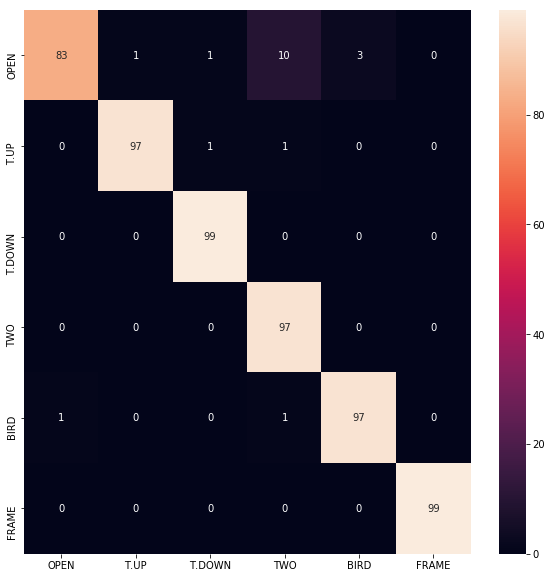

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(np.round(conf[0]/100, 1), index = ["OPEN", "T.UP", "T.DOWN", "TWO", "BIRD", "FRAME"],
                  columns = ["OPEN", "T.UP", "T.DOWN", "TWO", "BIRD", "FRAME"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

In [13]:
conf[0]

array([[1.6643e+04, 3.0500e+02, 2.3400e+02, 2.1520e+03, 7.6300e+02,
        3.0000e+00],
       [1.7000e+01, 1.9400e+04, 2.5800e+02, 3.1300e+02, 7.0000e+00,
        5.0000e+00],
       [2.3000e+01, 1.4000e+01, 1.9983e+04, 5.0000e+00, 5.5000e+01,
        2.0000e+01],
       [1.7800e+02, 9.5000e+01, 1.8000e+01, 1.9504e+04, 0.0000e+00,
        5.0000e+00],
       [3.6400e+02, 7.5000e+01, 6.0000e+00, 2.0600e+02, 1.9421e+04,
        2.8000e+01],
       [6.3000e+01, 2.0000e+00, 1.4000e+01, 0.0000e+00, 1.8000e+01,
        1.9803e+04]])